In [ ]:
# let's make a test for subpixel localization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from openpiv.pyprocess import find_first_peak

In [3]:
N = 64

corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
pos,height = find_first_peak(corr)

In [5]:
pos,height

((3, 4), 3.0)

In [6]:
from openpiv.pyprocess import find_subpixel_peak_position

In [7]:
find_subpixel_peak_position(corr)

(3.0, 3.769577293545741)

## let's find some corner cases

In [8]:
# peak on the border 
corr = np.zeros((N,N))

corr[:3,:3] = 1
corr[0,0] = 2
corr[0,2] = 3
corr[0,3] = 1
corr

array([[2., 1., 3., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Corner case 1: peak on the border

it is disregarded in our function because we cannot define well the subpixel
position. Or do we? 

In [9]:
find_subpixel_peak_position(corr)

(nan, nan)

In [10]:
# peak on the border 
corr = np.flipud(corr)
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [2., 1., 3., ..., 0., 0., 0.]])

In [11]:
find_subpixel_peak_position(corr)

(nan, nan)

In [12]:
corr = np.fliplr(corr)
corr[-2,-1]=5
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 5.],
       [0., 0., 0., ..., 3., 1., 2.]])

In [13]:
find_subpixel_peak_position(corr)

(nan, nan)

In [14]:
## Corner case 2: zero next to the peak - the log(0) fails

In [15]:
corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
# corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
find_subpixel_peak_position(corr)

(3.0, 3.5230088020336483)

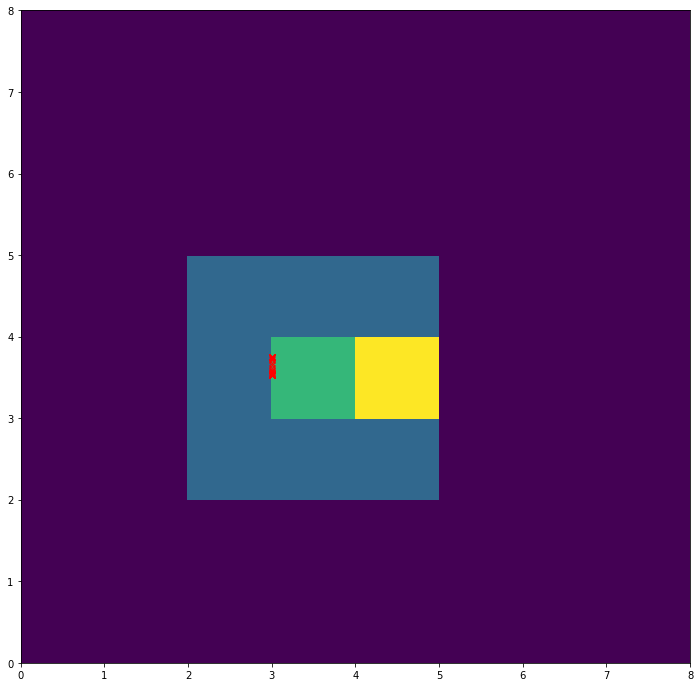

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
ax.pcolor(corr[:8,:8])
for eps in np.logspace(-15,5):
    i,j = find_subpixel_peak_position(corr+eps)
    # print(i,j)
    ax.plot(i,j,'rx')

In [18]:
import matplotlib.pyplot as plt

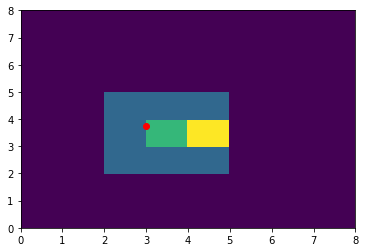

In [19]:
plt.pcolor(corr[:8,:8])
plt.plot(i,j,'ro')

In [20]:
for method in ['gaussian','parabolic','centroid']:
    i,j = find_subpixel_peak_position(corr,method)
    print(i,j)
    i,j = find_subpixel_peak_position(corr+eps,method)
    print(i,j)


3.0 3.5239508804084627
3.0 3.7499981250225445
3.0 3.75
3.0 3.75
3.0 3.600000095999977
3.0 3.9999933334444426
